In [137]:
import numpy as np
import IPython
import librosa

from scipy import signal as sp
from scipy.io import wavfile
from math import pi
from scipy.fftpack import fft
from scipy.fftpack import fftshift
from scipy.interpolate import interp1d as itp
import math

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import sounddevice as sd
from scipy.io.wavfile import write

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

def plot_signal(x, xaxis_label=None,yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return



In [267]:
#For all Problems a= 3

def spec_plot(x,window,overlap,title):
    freqs, times, spectrogram = scipy.signal.spectrogram(x,100,window=window,noverlap=overlap)
    plt.figure(figsize=(6,6))
    plt.imshow(spectrogram,origin='lower',aspect='auto') #aspect='auto', cmap='hot_r', origin='lower')
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    plt.tight_layout()
    

Text(0, 0.5, 'x(t)')

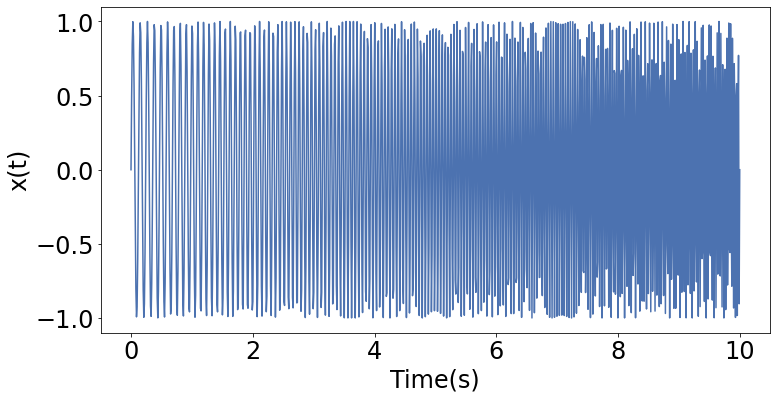

In [262]:
#Problem 1.1
Fs=100
t=np.linspace(0,10,num=1000)
#n=np.linspace(0,999,num=1000)
#x = np.sin(2*np.pi*(8 + 0.012*n)*n/100)
xt=np.sin(2*np.pi*(8+1.2*t)*t)
plt.plot(t,xt)
plt.xlabel('Time(s)')
plt.ylabel('x(t)')


[ 9.3 10.6 11.4 12.  12.6 13.1 13.5 13.9 14.3 14.7 15.1 15.4 15.7 16.
 16.3 16.6 16.9 17.1 17.4 17.6 17.9 18.1 18.4 18.6 18.8 19.  19.3 19.5
 19.7 19.9 20.1 20.3 20.5 20.7 21.  21.2 21.4 21.6 21.9 22.1 22.4 22.6
 22.9 23.1 23.4 23.7 24.  24.3 24.6 24.9 25.3 25.7 26.1 26.5 26.9 27.4
 28.  28.6 29.4 30.7 69.3 70.6 71.4 72.  72.6 73.1 73.5 73.9 74.3 74.7
 75.1 75.4 75.7 76.  76.3 76.6 76.9 77.1 77.4 77.6 77.9 78.1 78.4 78.6
 78.8 79.  79.3 79.5 79.7 79.9 80.1 80.3 80.5 80.7 81.  81.2 81.4 81.6
 81.9 82.1 82.4 82.6 82.9 83.1 83.4 83.7 84.  84.3 84.6 84.9 85.3 85.7
 86.1 86.5 86.9 87.4 88.  88.6 89.4 90.7]


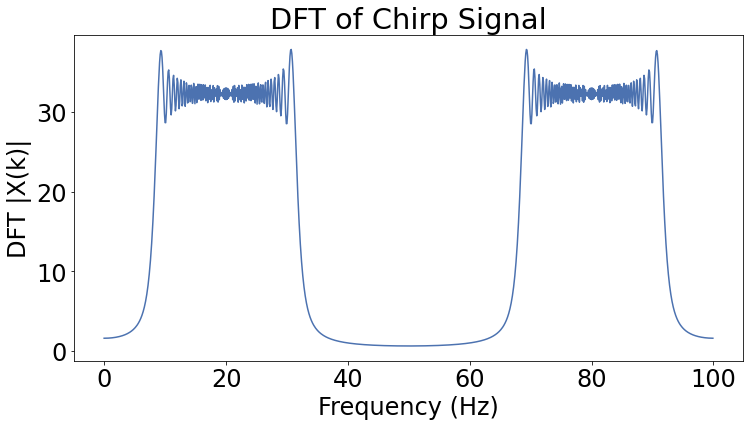

In [264]:
#Problem 1.2
Fs=100
n=np.linspace(0,999,num=1000)
x = np.sin(2*np.pi*(8 + 0.012*n)*n/Fs)
X=abs(fft(x))
#X=X[0:500]
#k=np.linspace(0,499,num=500)
xaxis = (n/1000)*Fs
plt.plot(xaxis,X);plt.xlabel('Frequency (Hz)'); plt.ylabel('DFT |X(k)|'); plt.title('DFT of Chirp Signal')
X_peaks=sp.find_peaks(X,distance=1,height=5)
A1=xaxis[X_peaks[0]]
print(A1)

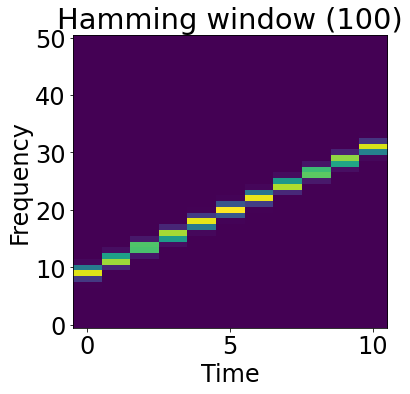

In [268]:
#Problem 1.3
n=np.linspace(0,999,num=1000)
x = np.sin(2*np.pi*(8 + 0.012*n)*n/Fs)
window=np.hamming(100)
#window1=np.blackman(100)
#spec_plot(x,window,0)
spec_plot(x,window,10,'Hamming window (100)')


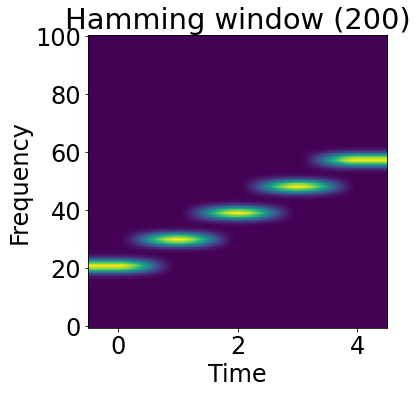

In [253]:
window_a=np.hamming(200)
spec_plot(x,window_a,10,'Hamming window (200)')

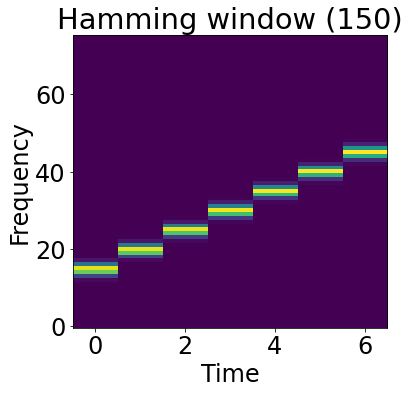

In [254]:
window_b=np.hamming(150)
spec_plot(x,window_b,10,'Hamming window (150)')

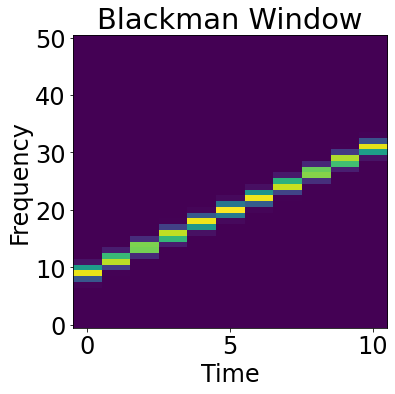

In [255]:
window1a=np.blackman(100)
spec_plot(x,window1a,10,'Blackman Window')


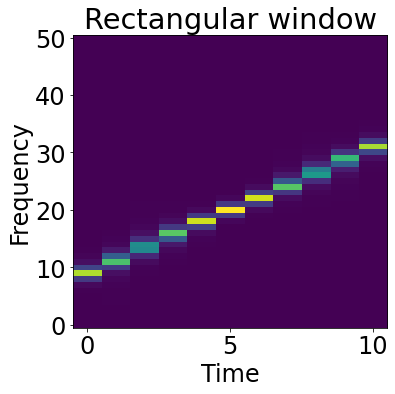

In [256]:
window2 = sp.windows.boxcar(100)
spec_plot(x,window2,10,'Rectangular window')

11025


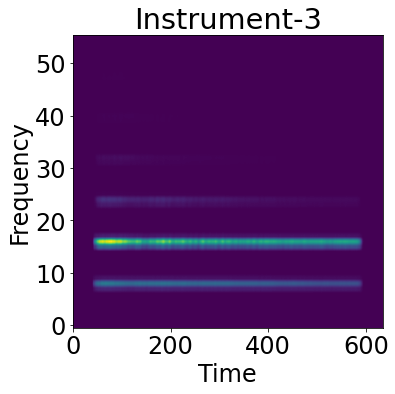

In [281]:
#Problem 2.1.1

import scipy
Fs1 , data= wavfile.read('instru3.wav')
print(Fs1)
w=np.hamming(111)
spec_plot(data,w,0,'Instrument-3')
IPython.display.Audio(data, rate=11025)

[  784.52889198  1566.24305004  2354.36854647  3141.24305004
  3925.77194202  4709.36258936  6315.63741064  7099.22805798
  7883.75694996  8670.63145353  9458.75694996 10240.47110802]


Text(0.5, 1.0, 'DFT of Instrument-3')

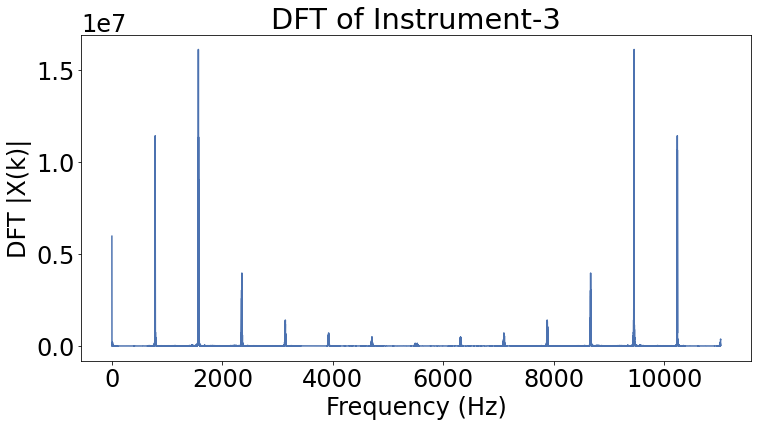

In [276]:
#Problem 2.1.2
datadft= fft(data)
N = len(datadft)
n = np.arange(N)
T = N/11025
freq = n/T 
a=data.size
xaxis=np.arange(0,a)
xaxis=(xaxis)*Fs1/a
X_peaks=sp.find_peaks(abs(datadft),distance=100,height=400000)
A1=xaxis[X_peaks[0]]
print(A1)
plt.plot(xaxis, abs(datadft));plt.xlabel('Frequency (Hz)'); plt.ylabel('DFT |X(k)|'); plt.title('DFT of Instrument-3')

44100


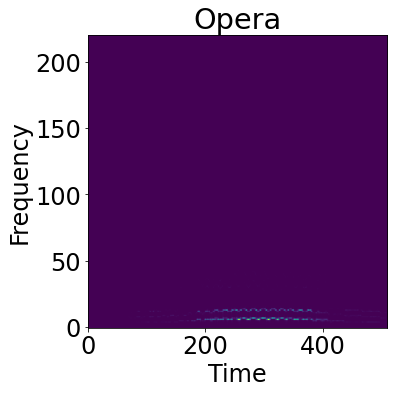

In [285]:
#Problem 2.2.1

import scipy
Fs2 , opera= wavfile.read('Opera.wav')
print(Fs2)
#w=np.hamming(10000)
w=sp.windows.boxcar(441)
spec_plot(opera,w,10,'Opera')

[  622.8  1287.4 42812.6 43477.2]


Text(0.5, 1.0, 'DFT of Opera')

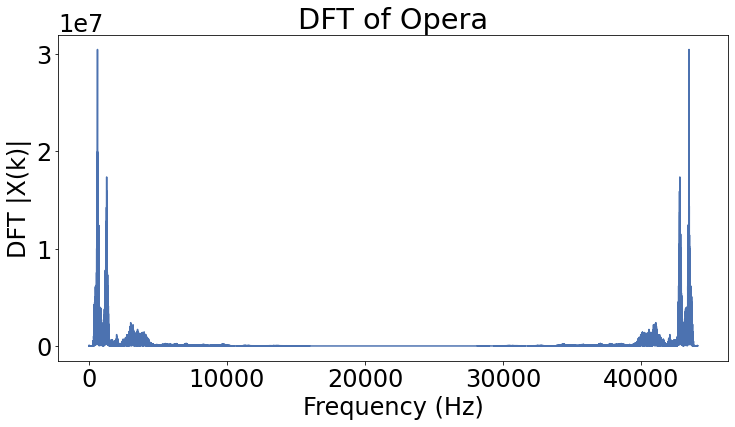

In [286]:
#Problem 2.2.2

operadft= abs(fft(opera))
N1 = len(operadft)
n1 = np.arange(N1)
T1 = N1/44100
freq1 = n1/T1 

X_peaks1=sp.find_peaks(abs(operadft),distance=1000,height=10000000)
A2=freq1[X_peaks1[0]]
print(A2)
plt.plot(freq1, abs(operadft));plt.xlabel('Frequency (Hz)'); plt.ylabel('DFT |X(k)|'); plt.title('DFT of Opera')

44100


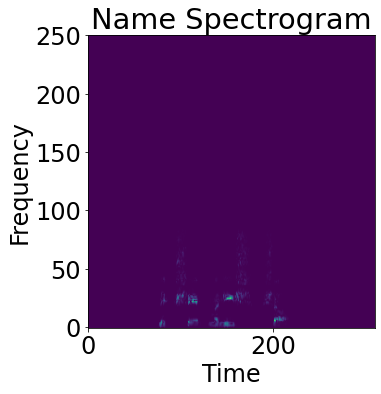

In [288]:
#Problem 3

import scipy
Fs , s= wavfile.read('Exp5-Name.wav')
s0 = s[:, 0]
print(Fs)
#s1=s/32767
s1= s0[1::10]
write("Name.wav",4410,s1.astype(np.float32))

window=np.blackman(500)
spec_plot(s0,window,0,'Name Spectrogram')

48000


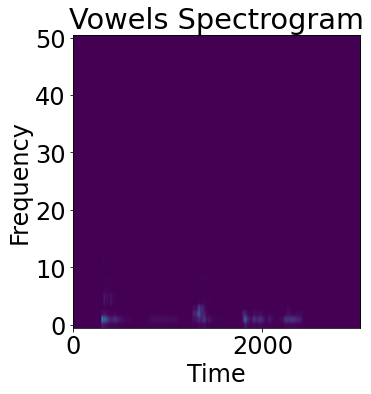

In [250]:
import scipy
Fs , s= wavfile.read('vowels.wav')
s0 = s[:, 0]
print(Fs)
#s1=s/32767
s1= s0[1::10]

#write("Name.wav",4410,s1.astype(np.float32))
window=np.hamming(100)
#plt.plot(abs(fft(s1*window)))
spec_plot(s0,window,0,'Vowels Spectrogram')